<table width=100%>
<tr>
    <td><h1 style="text-align: left; font-size:300%;">
        Classification Hands On Solutions
    </h1></td>
    <td width="30%">
    <div style="text-align: right">
    <b> Practical Data Science Lessons</b><br><br>
    <b> Riccardo Bertoglio</b><br>
    <a href="mailto:riccardo.bertoglio@polimi.it">riccardo.bertoglio@polimi.it</a><br>
    </div>
</tr>
</table>

[Exercise source: Harvard 2021 CS109-A: Introduction to Data Science](https://harvard-iacs.github.io/2021-CS109A/)

In [1]:
# Data and Stats packages
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# NEW packages
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier

# Visualization packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

<a id='data'></a>

## Wine Dataset


- Load and get to know a new dataset
- Select our predictors and response variable
- Generate a train-test-split
- Scale our data
- Perform logistic regression and investigate our results

![wine](fig/wine.jpg)

*Image source: https://en.wikipedia.org/wiki/Wine*

In [26]:
dataset_wine = datasets.load_wine()
# print(dataset_wine.keys())
# print()
print(dataset_wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [27]:
X_wine = pd.DataFrame(data=dataset_wine.data, columns=dataset_wine.feature_names)
y_wine = pd.DataFrame(data=dataset_wine.target, columns=['class'])
print(X_wine.shape)
print(y_wine.shape)

(178, 13)
(178, 1)


In [28]:
full_df_wine = pd.concat([X_wine, y_wine], axis=1)
full_df_wine.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


Uncomment and run the pairplot in the cell below if you wish to see a scatter-matrix of all variables contained in the wine dataset.

**Please note:** This plotting code will take a minute or so to run.

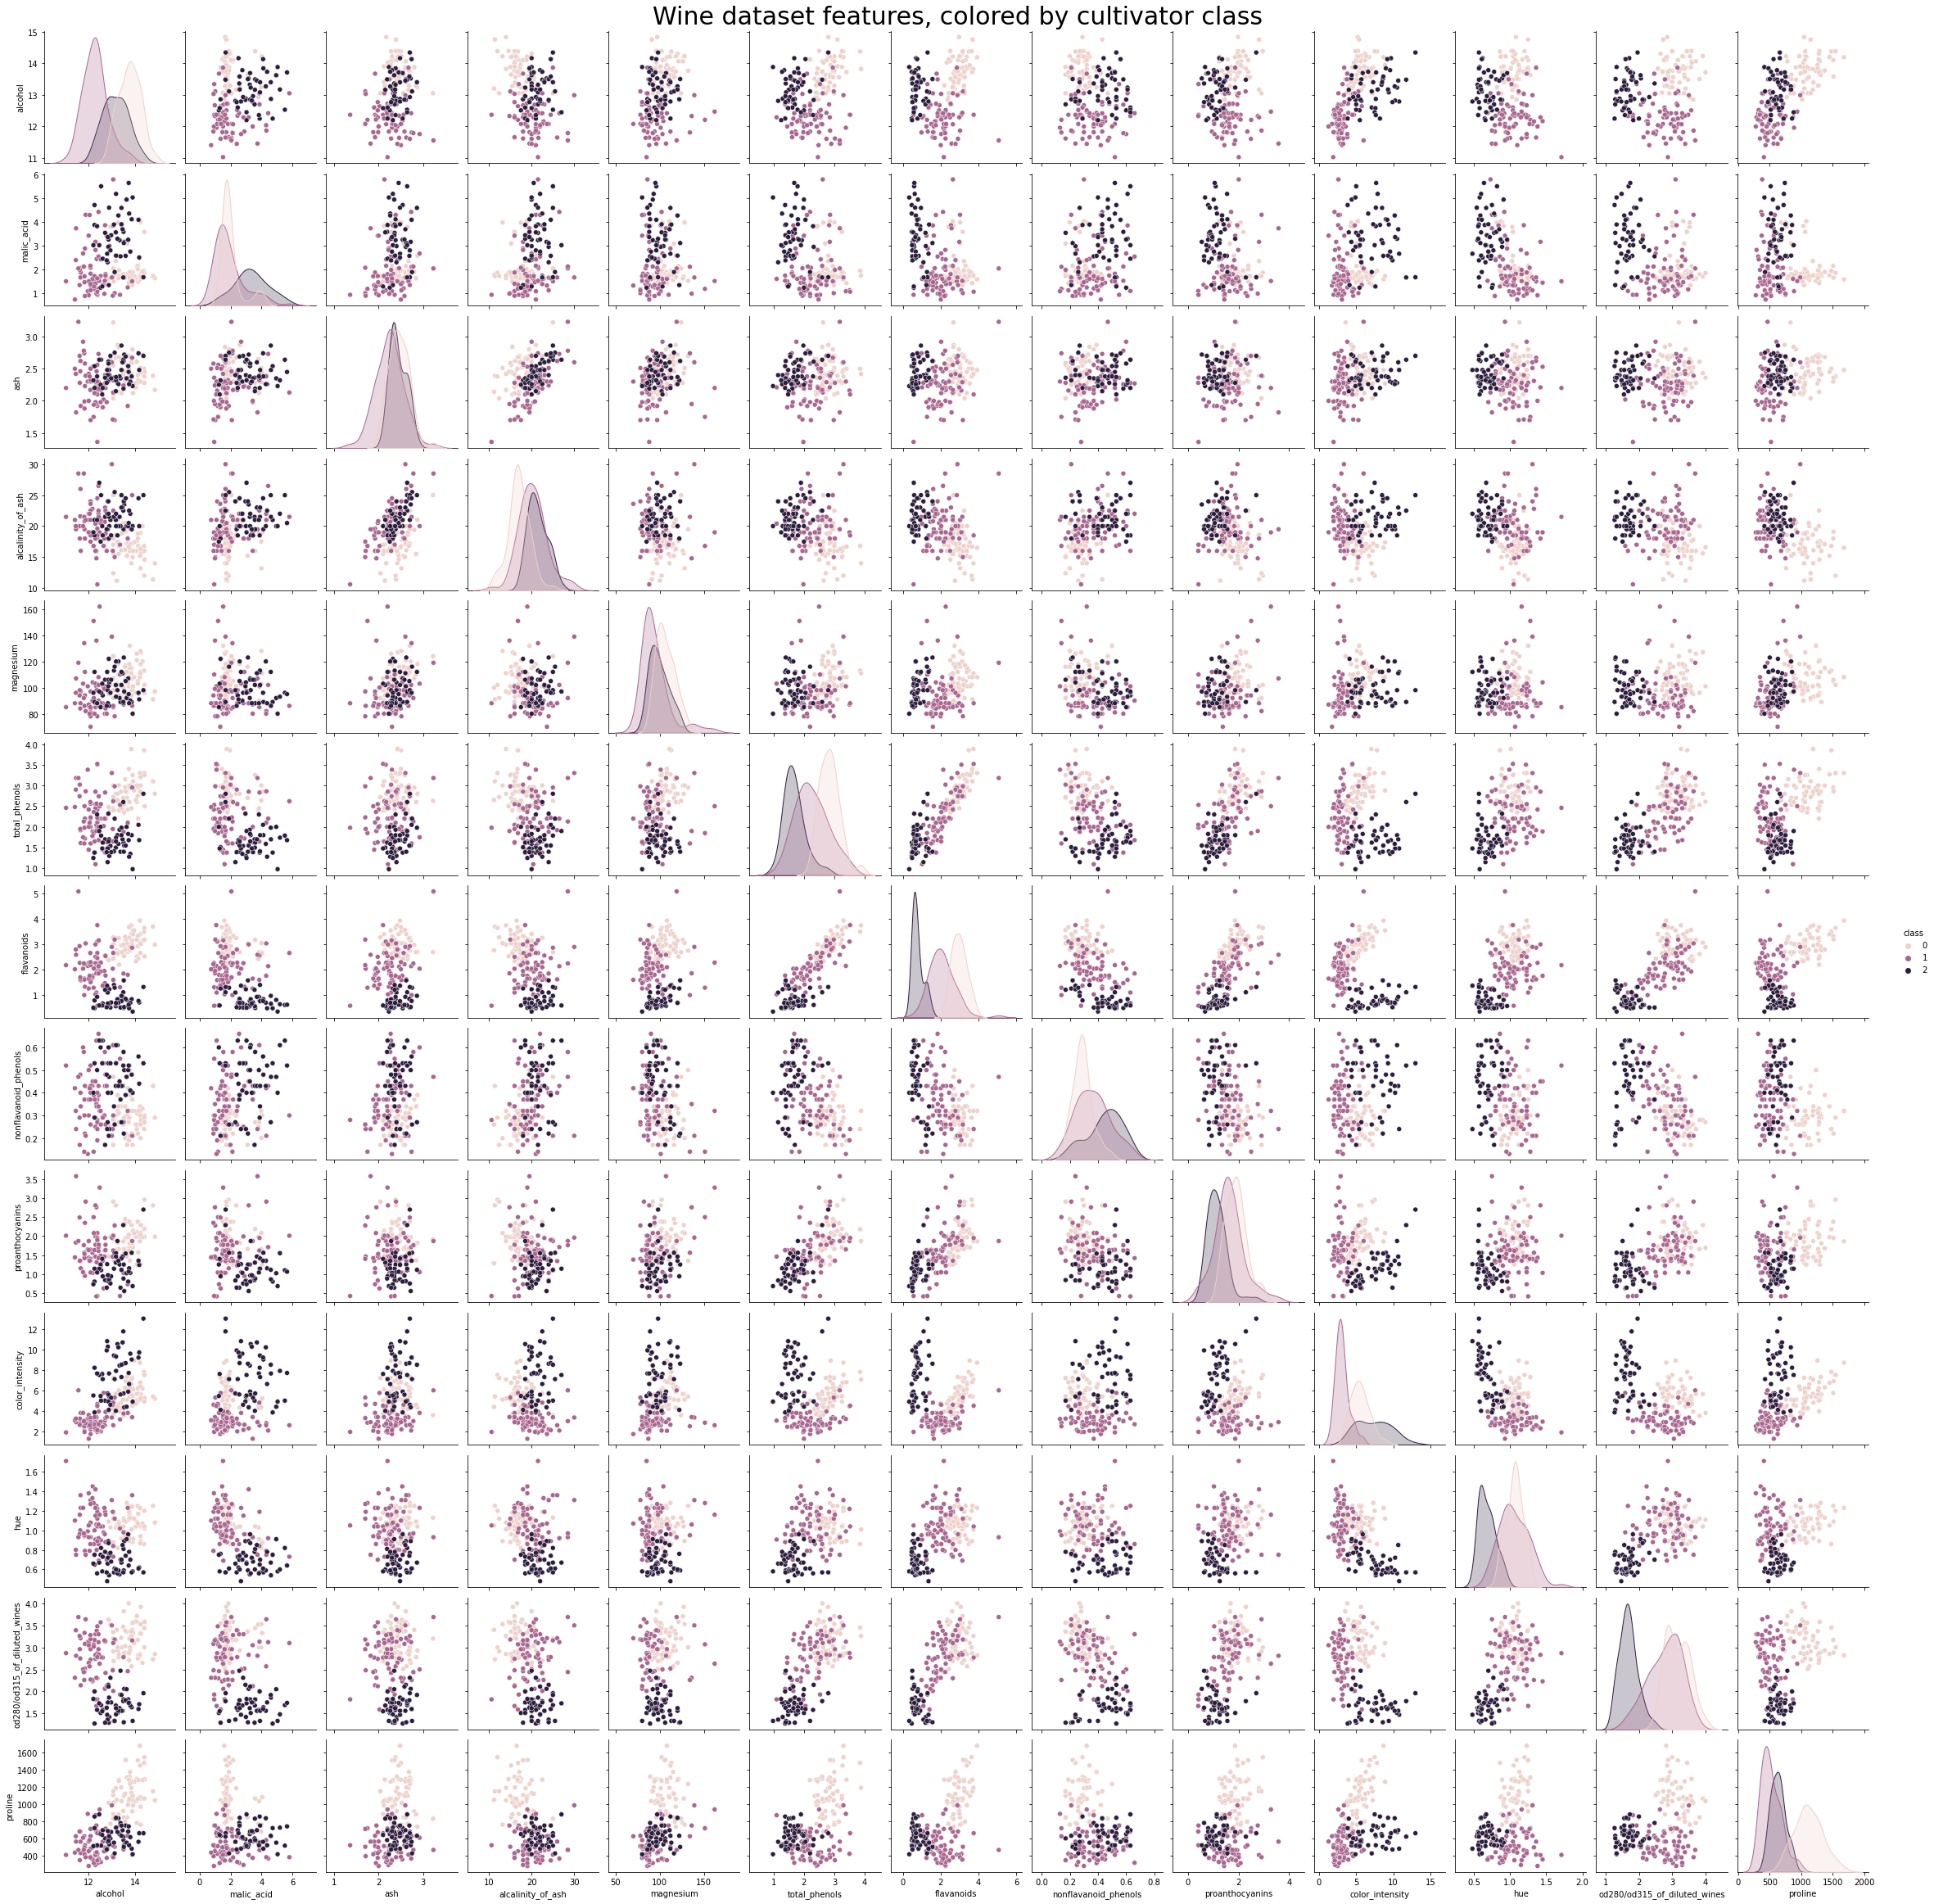

In [29]:
sns.pairplot(full_df_wine, hue='class')
plt.suptitle('Wine dataset features, colored by cultivator class', fontsize=30, y=1)
plt.show()

- The wine dataset provides many variables to use in our model.

- **Because we have limited time for this exercise, we will pretend we have already conducted an Exploratory Data Analysis (EDA) on our dataset and have chosen to focus solely on the predictors `alcohol` and `flavanoids`.**

- Run the code below to subset our full wine dataframe and to perform our train-test-split.

In [30]:
predictors = ['alcohol', 'flavanoids']

full_df_wine_train, full_df_wine_test, = train_test_split(
    full_df_wine[predictors+['class']],
    test_size=0.2,
    random_state=109,
    shuffle=True,
    stratify=full_df_wine['class'],
)

- Now let's take a quick look at our training data to get a sense for how `alcohol` and `flavanoids` relate to one another, as well as to our cultivator `class` response variable. 

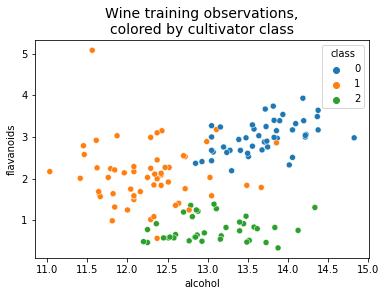

In [31]:
sns.scatterplot(
    data=full_df_wine_train,
    x='alcohol', y='flavanoids',
    hue='class', palette = sns.color_palette("tab10")[:3])
plt.title(
    'Wine training observations,\ncolored by cultivator class',
    fontsize=14
)
plt.show()

**What do you notice about the scale of our two predictor variables?**

- It looks like the mean is shifted, but the total range of values are similar.
- Let's standardize our predictors to center our points and to ensure that both variables are commonly scaled. Instantiate a `StandardScaler` object a fit it on the train data. Then transform the predictors. 
- **IMPORTANT:** Remember to fit your scaler ONLY on your training data and to transform both train and test from that training fit. NEVER fit your scaler on the test set.

In [32]:
###################################
## SUBSET OUR X AND y DATAFRAMES ##
###################################

X_wine_train, y_wine_train = full_df_wine_train[predictors], full_df_wine_train['class'] 
X_wine_test, y_wine_test = full_df_wine_test[predictors], full_df_wine_test['class']

# print(
#     "Summary statistics for our training predictors BEFORE standardizing:\n\n"
#     "{}\n".format(X_wine_train.describe())
# )

##########################
## SCALE THE PREDICTORS ##
##########################

# Be certain to ONLY EVER fit your scaler on X train (NEVER fit it on test)
scaler = StandardScaler().fit(X_wine_train[predictors])

# Use your train-fitted scaler to transform both X train and X test
X_wine_train[predictors] = scaler.transform(X_wine_train[predictors])
X_wine_test[predictors] = scaler.transform(X_wine_test[predictors])

# print(
#     "Summary statistics for our training predictors AFTER standardizing:\n\n"
#     "{}".format(X_wine_train.describe())
# )

### Next steps:
1. Fit a logistic regression model (name it `model1_wine`) without regularization (i.e. `penalty='none'`) to predict the `class` of each wine using our scaled predictors `alcohol` and `flavanoids`
2. Report on the training and test accuracy of our fitted model
3. Show that for each training prediction, the probability of each predicted class sums to one. (**HINT:** You can use the `predict_proba` method to generate your predicted probabilities.)

In [33]:
# Your code here

# Train model
model1_wine = LogisticRegression(penalty='none').fit(X_wine_train, y_wine_train)

# Score model
train_score = model1_wine.score(X_wine_train, y_wine_train)
test_score = model1_wine.score(X_wine_test, y_wine_test)

# Print scores
print("Training Set Accuracy: {:.4f}".format(train_score))
print("Testing Set Accuracy: {:.4f}\n".format(test_score))

# Predict probabilities for our training data
y_proba_train = model1_wine.predict_proba(X_wine_train)

# Check shape of our predictions to show that we have 3 probabilities predicted
# for each observation (i.e. predicted probabilities for each of our 3 classes)
print(
    "The shape of our predicted training probabilities array: {}\n"
    .format(y_proba_train.shape)
)

# Sum all 3 classes at each observation
print(
    "The sum of predicted probabilities for all 3 classes by observation:\n\n{}"
    .format(np.sum(y_proba_train, axis=1))
)

Training Set Accuracy: 0.9225
Testing Set Accuracy: 0.9444

The shape of our predicted training probabilities array: (142, 3)

The sum of predicted probabilities for all 3 classes by observation:

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## Visualize the decision boundaries

Using the `plot_wine_2d_boundaries` function provided below, you are going to plot the TRAINING data decision boundaries for `model1_wine` from the exercise above.

**To do this, you will need to:**

1. Define an appropriate `xx_1_wine` and `xx_2_wine` for input into this function using `np.meshgrid`
2. And call `plot_wine_2d_boundaries` specifying the appropriate input parameters

In [47]:
# We give you the plotting function here
def plot_wine_2d_boundaries(X_data, y_data, predictors, model, xx_1, xx_2):
    """Plots 2-dimensional decision boundaries for a fitted sklearn model
    
    :param X_data: pd.DataFrame object containing your predictor variables
    :param y_data: pd.Series object containing your response variable
    :param predictors: list of predictor names corresponding with X_data columns
    :param model: sklearn fitted model object
    :param xx_1: np.array object of 2-dimensions, generated using np.meshgrid
    :param xx_2: np.array object of 2-dimensions, generated using np.meshgrid
    """

    def plot_points(ax):
        for i, y_class in enumerate(set(y_data.values.flatten())):
            index = (y_data == y_class).values
            ax.scatter(
                X_data[index][predictors[0]],
                X_data[index][predictors[1]],
                c=colors[i],
                marker=markers[i],
                s=65, 
                edgecolor='w',
                label="class {}".format(i),
            )

    # Plotting decision regions
    f, ax = plt.subplots(1, 1, figsize=(7, 6))

    X_mesh = np.stack((xx_1.ravel(), xx_2.ravel()), axis=1)

    Z = model.predict(X_mesh)
    Z = Z.reshape(xx_1.shape)

    ax.contourf(xx_1, xx_2, Z, alpha=0.3, colors=colors, levels=2)

    plot_points(ax)

    ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
    ax.set_title(
        'Wine cultivator class prediction\ndecision boundaries',
        fontsize=16
    )
    ax.set_xlabel(predictors[0], fontsize=12)
    ax.set_ylabel(predictors[1], fontsize=12)

    plt.tight_layout()
    plt.show()

<div class='exercise-r'>  
 
#### Enter your code below
    
</div>

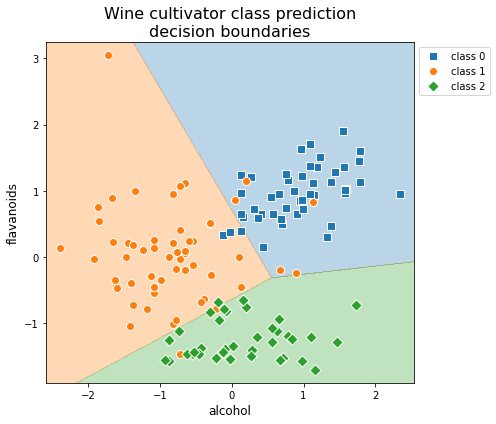

In [48]:
## Your code here

# Using an approach similar to what was used in the Iris example
# we can identify appropriate boundaries for our meshgrid by
# referencing the actual wine data

x_1_wine = X_wine_train[predictors[0]]
x_2_wine = X_wine_train[predictors[1]]

x_1_min_wine, x_1_max_wine = x_1_wine.min() - 0.2, x_1_wine.max() + 0.2
x_2_min_wine, x_2_max_wine = x_2_wine.min() - 0.2, x_2_wine.max() + 0.2

# Then we use np.arange to generate our interval arrays
# and np.meshgrid to generate our actual grids

xx_1_wine, xx_2_wine = np.meshgrid(
    np.arange(x_1_min_wine, x_1_max_wine, 0.003),
    np.arange(x_2_min_wine, x_2_max_wine, 0.003)
)

# Now we have everything we need to generate our plot

plot_wine_2d_boundaries(
    X_wine_train,
    y_wine_train,
    predictors,
    model1_wine,
    xx_1_wine,
    xx_2_wine,
)

## Regularization

**Tune and fit a Lasso regularized model using cross-validation.**


- Perform Lasso regularized logistic regression and choose an appropriate `C` by using cross-validation


- Confirm whether any predictors are identified as unimportant (i.e. $w_i=0$)



**There are a number of different tools built into `sklearn` that help you to perform cross-validation.**

- A lot of examples in this class so far have used `sklearn.model_selection.cross_validate` as the primary means for peforming cross-validation.


- **BUT WAIT!!!** As it turns out, `sklearn` provides a very useful tool for performing logistic regression cross-validation across a range of regularization hyperparameters.

**For this problem, you should use the `sklearn.linear_model.LogisticRegressionCV`.**

### Next steps:

1. Add a new predictor to your `X` data measuring the interaction between `alcohol` and `flavanoid` (make certain to do this for both your training and TEST `X` dataframes).

    
2. Please review the documentation to learn how to fit and use the `LogisticRegressionCV` model object: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html

    
3. Using `LogisticRegressionCV` to fit your model, perfrom cross-validation with `3` k-folds, Lasso-like regularization, and the following list of regularization parameters `[1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]`.

    
4. Print (1) the regularization parameter chosen by the model, (2) your train and test accuracies, and (3) your model coefficients (including the intercept).

In [53]:
## Your code here.

# create interaction term for both train and test sets

for df in [X_wine_train, X_wine_test]:
    df["_".join(predictors)] = df[predictors[0]] * df[predictors[1]]

# View the resulting dataframe
display(X_wine_train.head())

print()

# Fit cv logistic regression model to predictors (including interaction term)

Cs = [1e-4,1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4]
cv = 3
penalty = 'l1'
solver = 'liblinear'

model2_wine = LogisticRegressionCV(
    Cs=Cs, cv=cv, penalty=penalty, solver='liblinear'
).fit(X_wine_train, y_wine_train)

model2_score_train = model2_wine.score(X_wine_train, y_wine_train)
model2_score_test = model2_wine.score(X_wine_test, y_wine_test)

model2_coefficients = np.hstack(
    [model2_wine.intercept_.reshape(-1, 1), model2_wine.coef_]
).T

print(
    "The regularization parameter C chosen by this model for each class "
    "was:\n\n\t{}\n\n"
    "The accuracy scores for this model are:"
    "\n\n\tTrain\t{:.4f}\n\tTEST\t{:.4f}\n"
    .format(model2_wine.C_, model2_score_train, model2_score_test)
)

print(
    "The coefficients for this model by class are:"
    "\n\n\t\t\t\tclass\n\t\t\t\t0\t\t1\t\t2\n"
)

coef_names = ["intercept"] + list(X_wine_train.columns)

for name, values in zip(coef_names, model2_coefficients):
    coefs_formatted = ["{:.4f}".format(val) for val in values]
    print("\t{}   \t\t{}".format(name, "\t\t".join(coefs_formatted)))

,alcohol,flavanoids,alcohol_flavanoids
72,0.673974,-0.196120,-0.132180
151,-0.196517,-0.677314,0.133104
104,-0.544714,-0.115921,0.063144
0,1.594208,1.026913,1.637113
74,-1.228671,0.104626,-0.128551



The regularization parameter C chosen by this model for each class was:

	[1. 1. 1.]

The accuracy scores for this model are:

	Train	0.9296
	TEST	0.9444

The coefficients for this model by class are:

				class
				0		1		2

	intercept   		-1.4600		-0.3141		-2.7530
	alcohol   		1.9303		-3.2820		1.3554
	flavanoids   		2.2720		1.0928		-4.3461
	alcohol_flavanoids   		1.2577		-1.0988		-0.8370
